# PlantUML 

## Introducción

[PlantUML](https://plantuml.com/) es una herramienta de dibujo de diagramas. Soporta varios de los diagramas más usados. Entre ellos destacan:

* Diagramas de Secuencia
* Diagramas de Clases
* Diagramas de Estados
* Diagramas de Actividad

Una de sus ventajas es que se puede integrar con una gran cantidad de aplicaciones. Otra de sus ventajas es la simplicidad e intuitividad de su sintaxis, por ejemplo, para hacer una flecha en un diagrama de secuencia se usa “->”; si se necesita una flecha discontinua se usaría “–>»; una relación de herencia en un diagrama de clases “<|--”.

Es importante recordar que es una herramienta de dibujo. Esto quiere decir que es posible dibujar diagramas inconsistentes si no se tiene algo de cuidado.

### Instalación


* Instalar [Graphviz](https://plantuml.com/es/graphviz-dot). Es necesario para poder generar la mayoría de los diagramas.
*  Instalar plantuml. En un sistema basado en Debian, puede instalar el paquete plantuml. De lo contrario, puede descargar `plantuml.jar` y copiarlo en `/usr/local/bin/plantuml.jar`.
* Para correr estos ejemplos en jupyter notebook, debemos intalar [iplantuml](https://github.com/jbn/IPlantUML).

## Ejemplos

### Diagramas de secuencia

Comencemos, pues, a dibujar. Lo principal es empezar cada uno de nuestros diagramas con @startuml y terminarlos con @enduml. Veremos mediante ejemplos qué cosas se pueden hacer con esta herramienta, desde algo sencillo a algo más complejo. La complejidad y el tamaño de los diagramas puede ser atroz. Por si os queréis hacer una idea, en la documentación se habla de un problema de memoria para diagramas de mas de 20000 x 10000px, pudiéndose arreglar aumentando la memoria que usa la JVM. Nosotros no vamos a llegar a tanto, empezamos con un diagrama sencillo tal que así:

In [1]:
import iplantuml

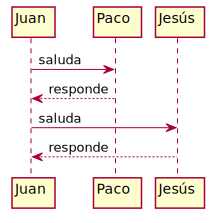

In [2]:
%%plantuml 

@startuml
Juan -> Paco: saluda
Juan <-- Paco: responde
Juan -> Jesús: saluda
Juan <-- Jesús: responde 
@enduml

También podemos declarar distintos participantes en el diagrama, como un actor (el monigote de los diagramas) o una base de datos, entre otros. Incluso añadir notas, o cambiar la apariencia de todo. Completando el ejemplo anterior… (lo siento Jesús, te he convertido en baseDeDatos)

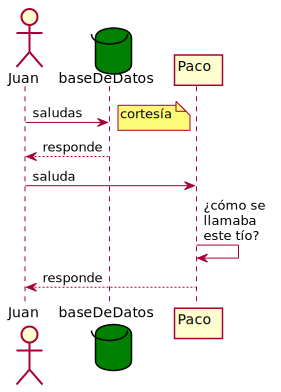

In [3]:
%%plantuml 

@startuml

actor Juan
database baseDeDatos #green

Juan -> baseDeDatos: saludas
note right: cortesía
Juan <-- baseDeDatos: responde

Juan -> Paco: saluda
Paco -> Paco: ¿cómo se \nllamaba \neste tío?
Juan <-- Paco: responde

@enduml

Como podemos ver, las posibilidades se hacen enormes según descubrimos nuevos elementos que añadir en nuestros diagramas, así como formas de combinarlos. En el siguiente código podemos ver una muestra de las posibilidades:

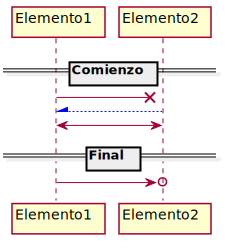

In [4]:
%%plantuml 

@startuml
 
== Comienzo==
 
Elemento1 -X Elemento2
Elemento2 -[#0000FF]-\ Elemento1
Elemento2 <-> Elemento1
 
== Final ==
 
Elemento1 ->o Elemento2
 
@enduml

Con esto terminamos con los diagramas de secuencia, podemos hacernos una idea de las posibilidades.

### Diagramas de clases
Lo siguientes diagramas que tenemos en la lista son los diagramas de clases, vamos a analizarlos. A continuación exponemos las principales operaciones entre clases: Herencia, composición y agregación.

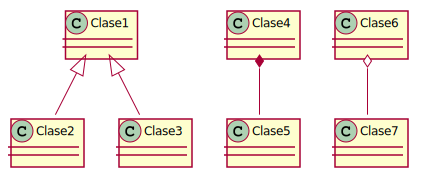

In [5]:
%%plantuml 
@startuml

Clase1 <|-- Clase2
Clase1 <|-- Clase3
Clase4 *-- Clase5
Clase6 o-- Clase7

@enduml

Como hemos hecho antes, ahora completamos el diagrama con más elementos para demostrar la potencia: nombres a las relaciones, métodos, etc.

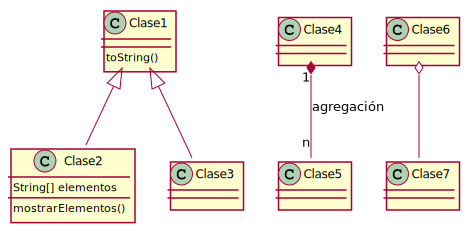

In [6]:
%%plantuml 
@startuml
 
class Clase1{
      toString()
}
 
class Clase2 {
      String[] elementos
      mostrarElementos()
}
 
Clase1 <|-- Clase2
Clase1 <|-- Clase3
 
Clase4 "1" *-- "n" Clase5 :agregación
Clase6 o-- Clase7
 
@enduml

Tenemos muchas más opciones para relacionar clases entre sí, más ejemplos:



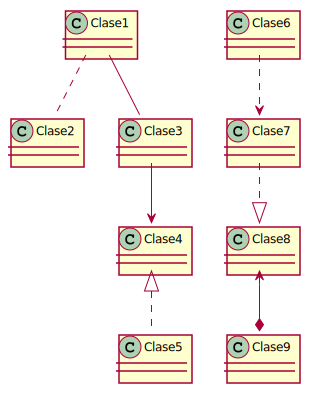

In [7]:
%%plantuml 
@startuml
 
Clase1 .. Clase2
Clase1 -- Clase3
Clase3 --> Clase4
Clase4 <|.. Clase5
Clase6 ..> Clase7
Clase7 ..|> Clase8
Clase8 <--* Clase9
 
@enduml

Para acabar con este tipo de diagramas, vamos a hablar de la visibilidad de métodos y atributos, así como la posibilidad de trabajar con interfaces o clases abstractas, dejando muchas cosas en el tintero para que podáis investigar (y no os de tanta pereza leer un artículo tan largo).

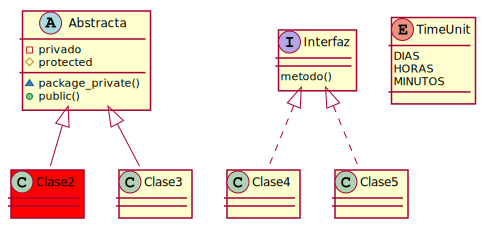

In [8]:
%%plantuml 
@startuml
 
abstract Abstracta{
      -privado
      #protected
      ~package_private()
      +public()
}
 
interface Interfaz {
      metodo()
}
 
enum TimeUnit {
      DIAS
      HORAS
      MINUTOS
}
 
class Clase2 #red
 
Abstracta <|-- Clase2
Abstracta <|-- Clase3
 
Interfaz <|.. Clase4
Interfaz <|.. Clase5
 
@enduml

### Diagramas de estados
Seguimos con los diagramas de estados de toda la vida, que simbolizan un esquema de transiciones entre diversos estados.

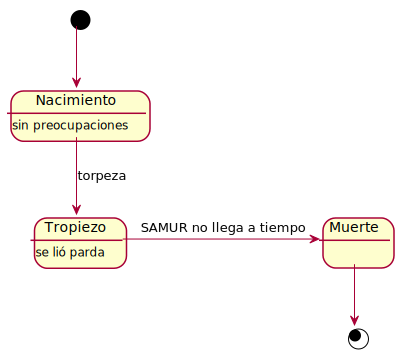

In [9]:
%%plantuml 
@startuml
[*] --> Nacimiento
Nacimiento : sin preocupaciones
Tropiezo: se lió parda
Nacimiento --> Tropiezo : torpeza
Tropiezo -> Muerte : SAMUR no llega a tiempo
Muerte --> [*]
@enduml

Se pueden tener además estados compuestos. Completando el ejemplo anterior con un estado compuesto nos quedaría algo como lo siguiente:

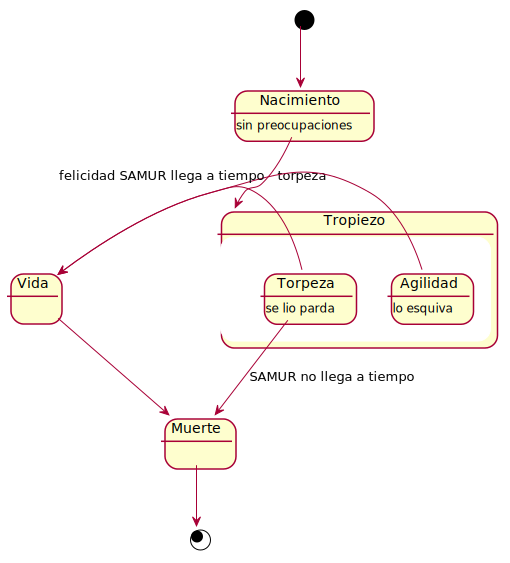

In [10]:
%%plantuml 
@startuml
[*] --> Nacimiento
Nacimiento : sin preocupaciones
state Tropiezo {
     Agilidad: lo esquiva
     Torpeza: se lio parda
}
Nacimiento --> Tropiezo : torpeza
Agilidad -> Vida : felicidad
Torpeza -> Muerte : SAMUR no llega a tiempo
Torpeza -> Vida : SAMUR llega a tiempo
Vida --> Muerte
Muerte --> [*]
@enduml

A grandes rasgos es todo para este tipo de diagramas. Señalar que las flechas de transiciones entre estados se adaptan bastante bien a los elementos con los que puedan colisionar.

## Otros diagramas

### Agrupando componentes

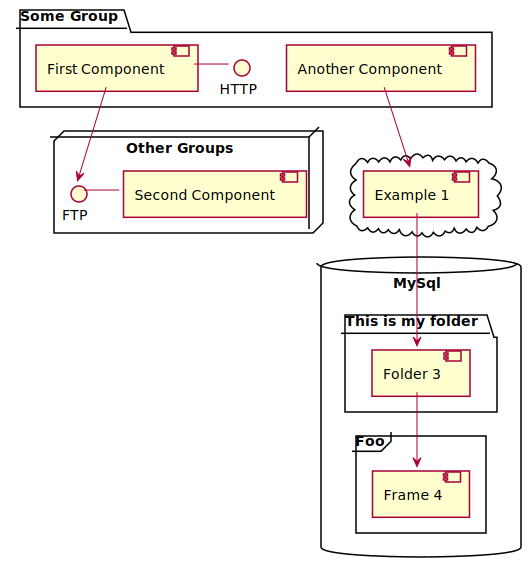

In [11]:
%%plantuml 
@startuml

package "Some Group" {
  HTTP - [First Component]
  [Another Component]
}

node "Other Groups" {
  FTP - [Second Component]
  [First Component] --> FTP
}

cloud {
  [Example 1]
}


database "MySql" {
  folder "This is my folder" {
    [Folder 3]
  }
  frame "Foo" {
    [Frame 4]
  }
}


[Another Component] --> [Example 1]
[Example 1] --> [Folder 3]
[Folder 3] --> [Frame 4]

@enduml